# Homework week 6
## Part I
### Screenshots

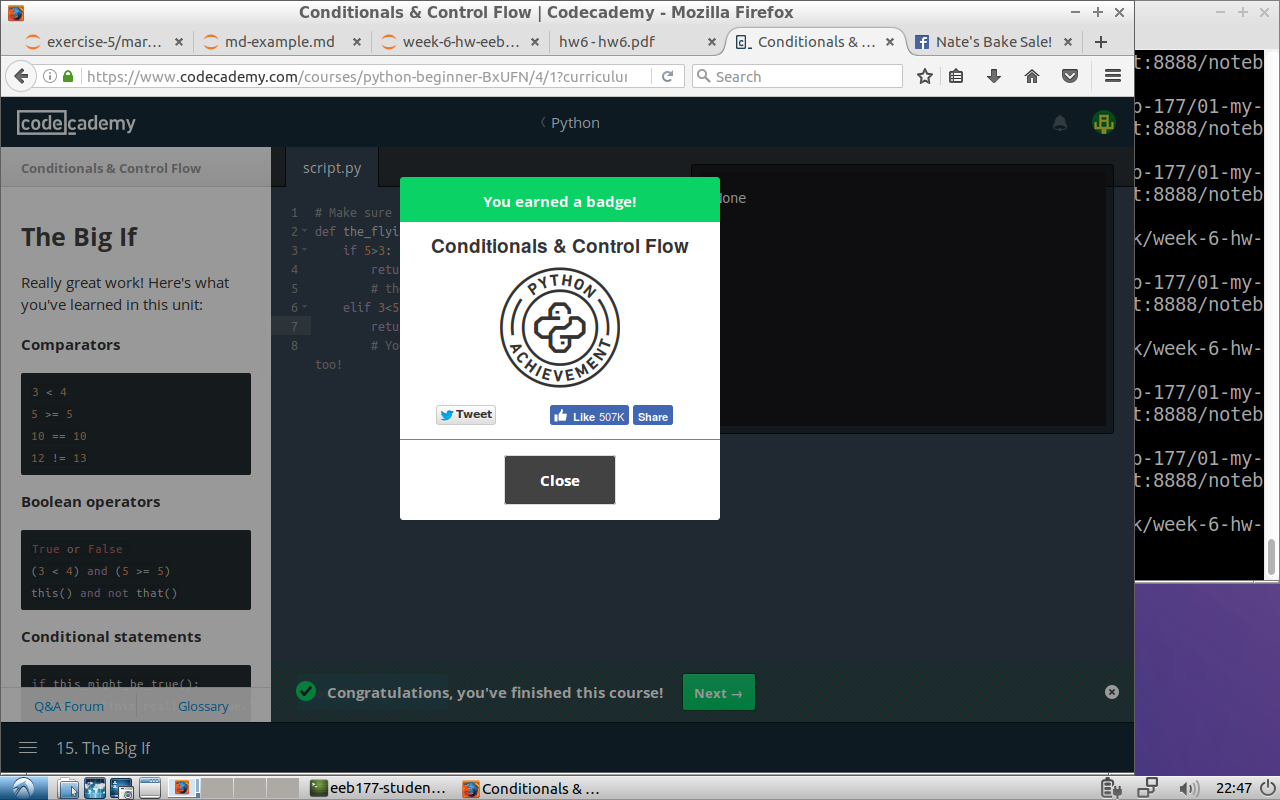

In [34]:
from IPython.display import Image
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Conditionals_and_control_flow.png")

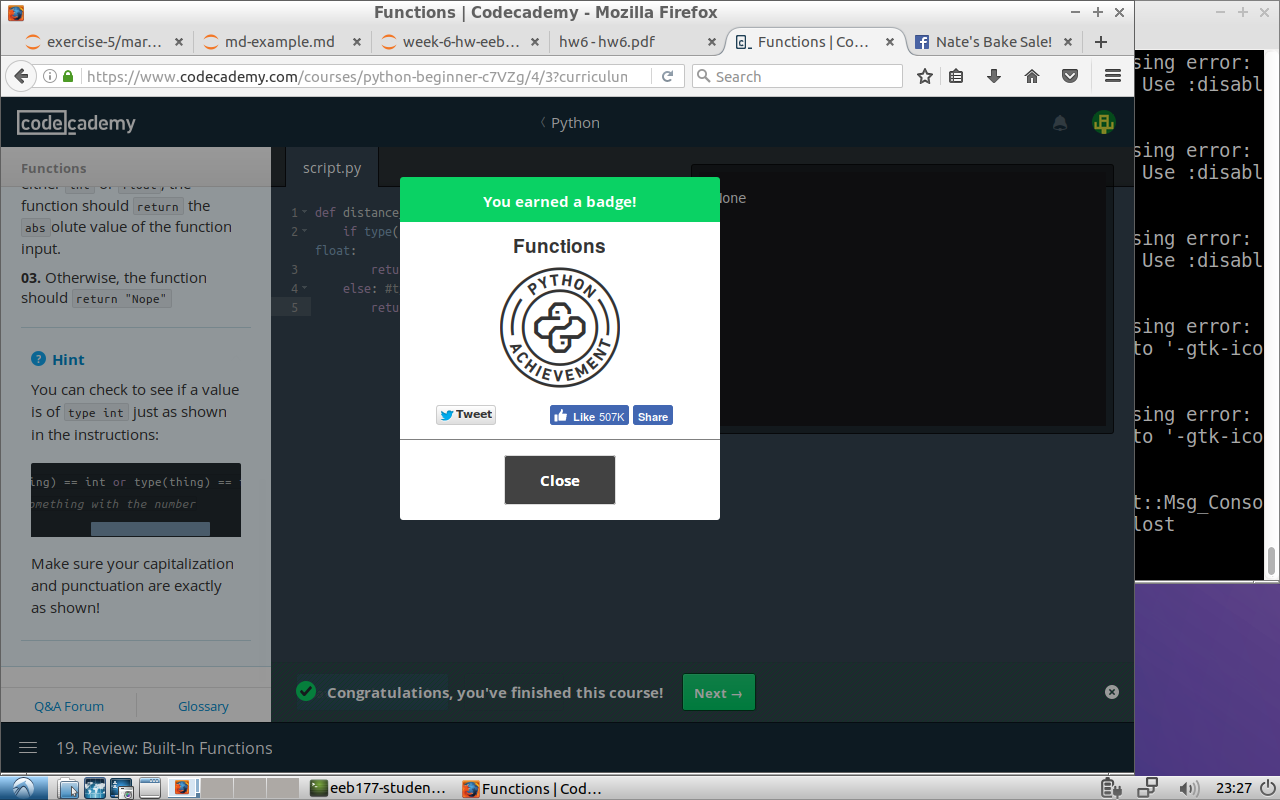

In [33]:
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Functions.png")


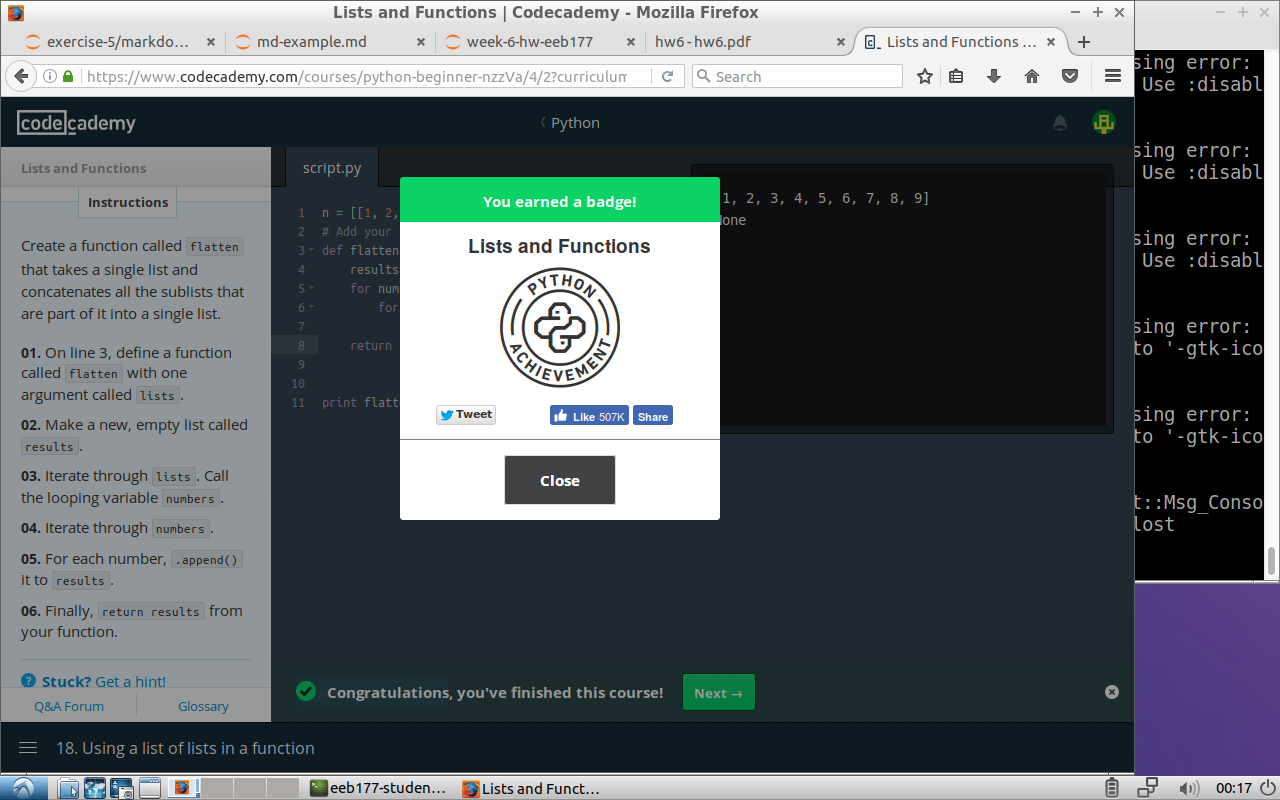

In [25]:
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Lists_and_Functions.png")


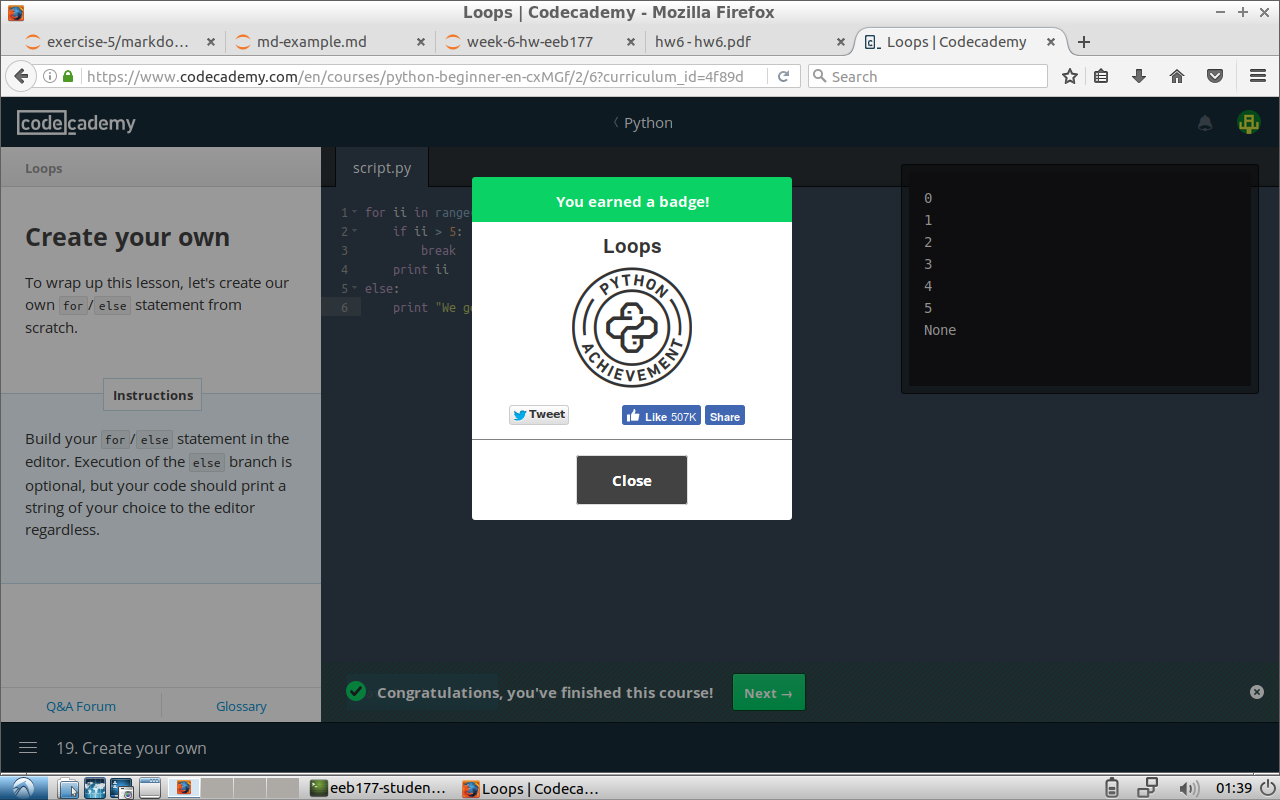

In [27]:
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Loops.png")


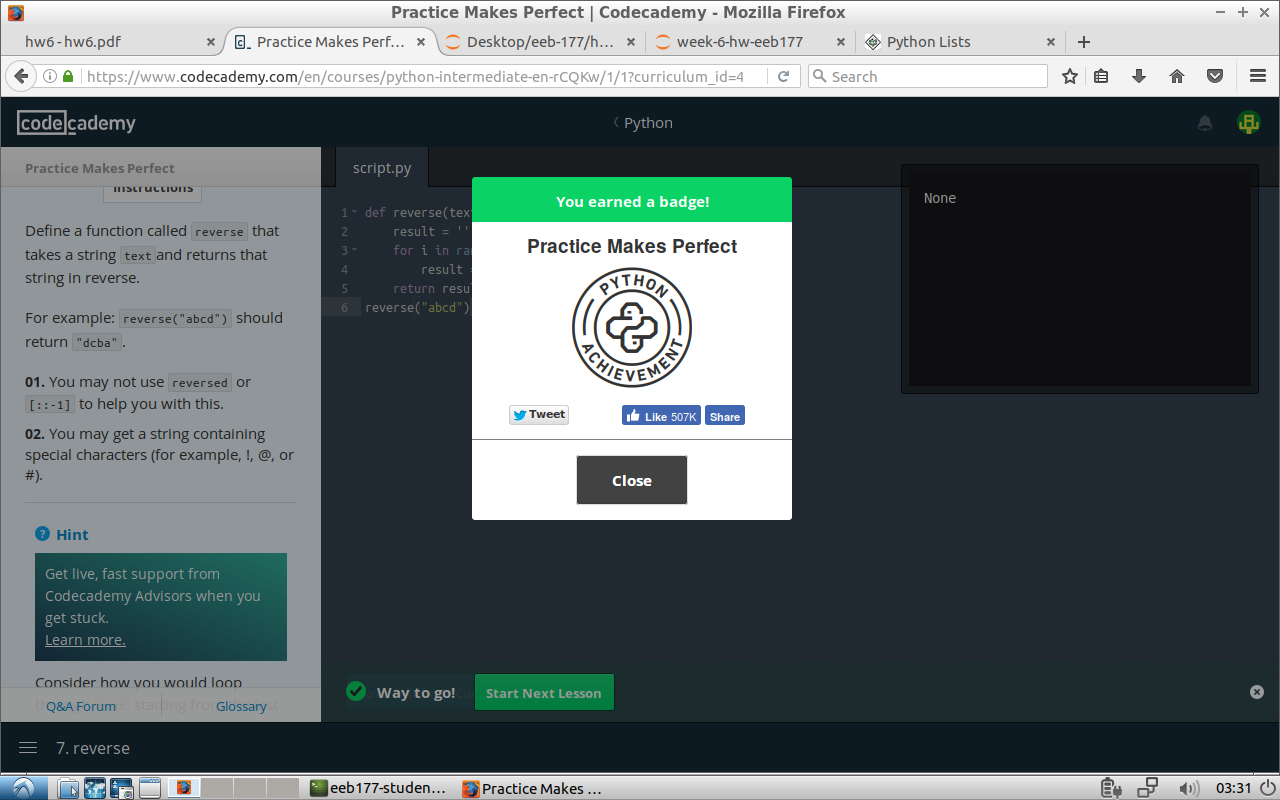

In [28]:
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Practice_makes_perfect.png")


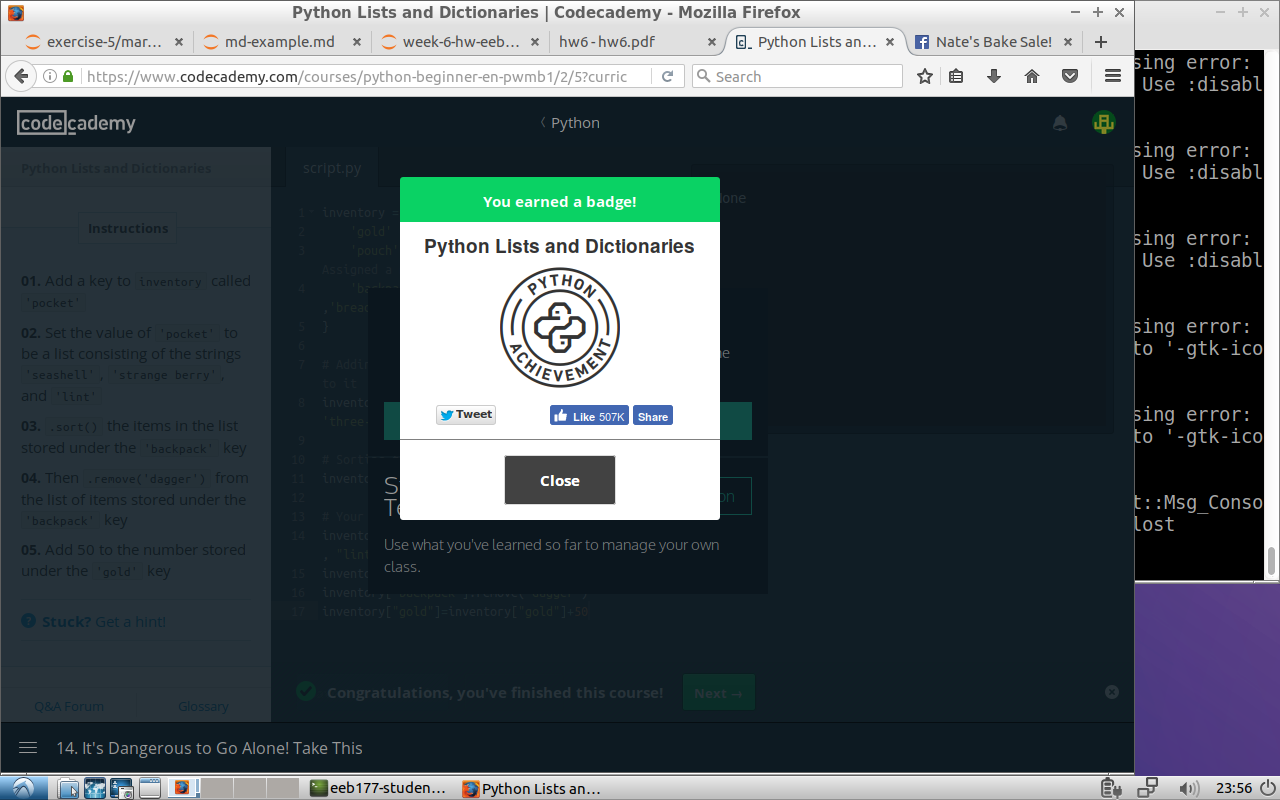

In [31]:
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Python_Lists_and_Dictionaries.png")


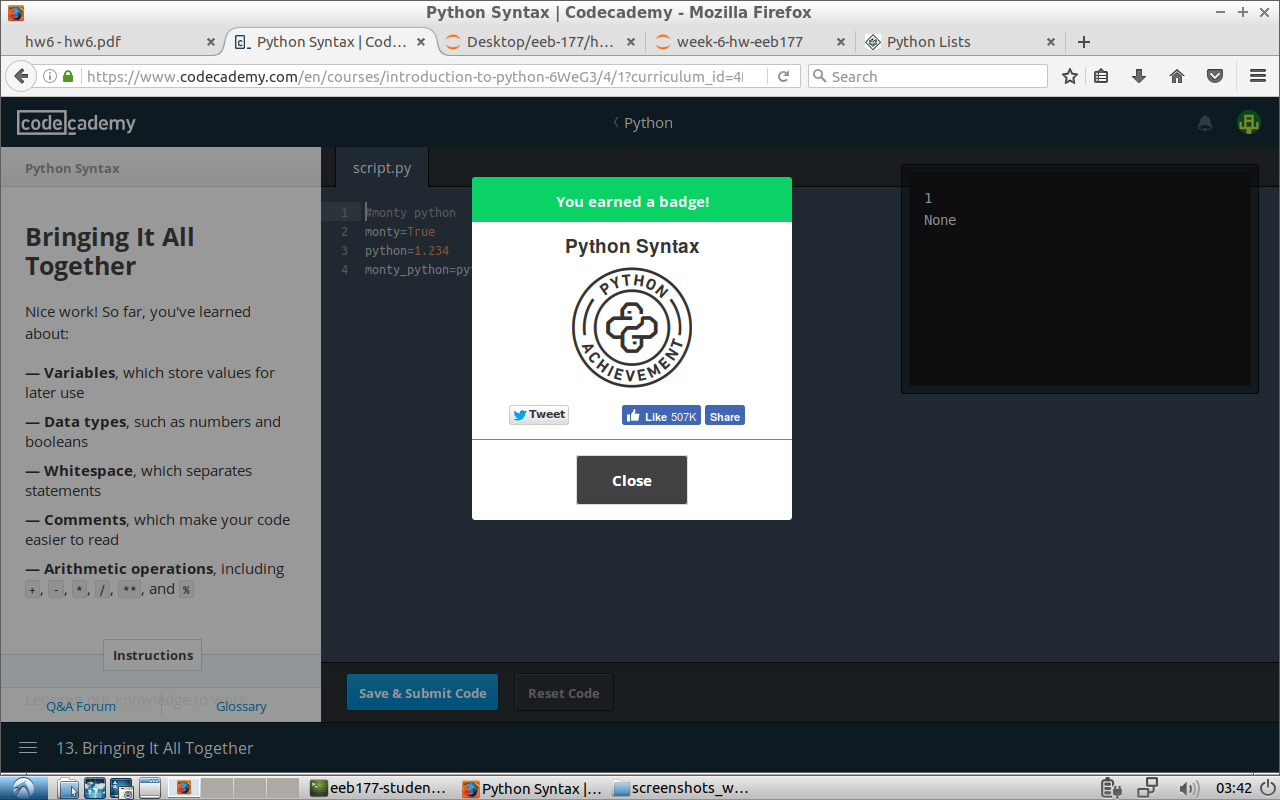

In [32]:
Image("/home/eeb177-student/Desktop/eeb-177/homework/screenshots_week6/Python_syntax.png")

## Part II
### Psuedocode
create a dictionary with the codon as a key and protein as value
make sure dna is uppercase
create an empty string to concatenate protein onto
for loop to iterate over every three
    codon is three letters
        exit loop if stop codon
        add protein if protein valid
        put in x if codon unkown
return protein

In [23]:
def dnatranslator(dna):
    dna=dna.upper() #make sure dna is uppercase
    gencode={'TTT':'F',   'TCT':'S',  'TAT':'Y',    'TGT':'C','TTC':'F',   'TCC':'S',    'TAC':'Y',     'TGC':'C', 
'TTA':'L',     'TCA':'S',     'TAA':'*',     'TGA':'*', 
'TTG':'L',     'TCG':'S',     'TAG':'*',     'TGG':'W', 
'CTT':'L',     'CCT':'P',     'CAT':'H',     'CGT':'R', 
'CTC':'L',     'CCC':'P',     'CAC':'H',     'CGC':'R', 
'CTA':'L',     'CCA':'P',     'CAA':'Q',     'CGA':'R', 
'CTG':'L',     'CCG':'P',     'CAG':'Q',     'CGG':'R', 
'ATT':'I',     'ACT':'T',     'AAT':'N',     'AGT':'S', 
'ATC':'I',     'ACC':'T',     'AAC':'N',     'AGC':'S', 
'ATA':'I',     'ACA':'T',     'AAA':'K',     'AGA':'R', 
'ATG':'M',     'ACG':'T',     'AAG':'K',     'AGG':'R', 
'GTT':'V',     'GCT':'A',     'GAT':'D',     'GGT':'G', 
'GTC':'V',     'GCC':'A',     'GAC':'D',     'GGC':'G', 
'GTA':'V',     'GCA':'A',     'GAA':'E',     'GGA':'G', 
'GTG':'V',     'GCG':'A',     'GAG':'E',     'GGG':'G', }
    protein = '' #empty string to concatenate protein onto
    for ii in range(0, len(dna) - 2, 3): #for loop to iterate over every three
        codon = dna[ii:ii + 3] #codon is three letters
        
        if codon in gencode.keys():
            if gencode[codon] == '*': #exit loop if stop codon
                break
            protein = protein + gencode[codon] #add protein if protein valid
        else:
            protein = protein + 'X' #put in x if codon unkown
        
    return protein
print(dnatranslator("ATGGTCAGTAGGTTGGTAC")) #works with normal code
print(dnatranslator("ATGacacgtcagcatcgactacg")) #works with lower case
print(dnatranslator("ATGAHASCKCCCTCGCTCGTTCGCTTAT")) #works with "unknown" amino acids
print(dnatranslator("ATGTAAATGATGATTATTGTA")) #works with stop codon

MVSRLV
MTRQHRL
MXXPSLVRL
M


## Part III

### 1)

In [36]:

import scipy # for random numbers

def build_population(N, p):
    # The population consists of N individuals.Each individual has two chromosomes, containing
      # allele "A" or "a", with probability p and 1-p, respectively.

    population =[]
    for i in range(N):
        allele1 = "A"
        if scipy.random.rand() > p:
            allele1 = "a"
        allele2 = "A"
        if scipy.random.rand() > p:
            allele2 = "a"
        population.append((allele1, allele2))
    return population

def compute_frequencies(population):
#Count the genotypes. Returns a dictionary with counts for each genotype.

    AA = population.count(('A', 'A'))
    Aa = population.count(('A', 'a'))
    aA = population.count(('a', 'A'))
    aa = population.count(('a', 'a'))
    return({'AA': AA, 'aa': aa, 'Aa': Aa,'aA': aA})

def reproduce_population(population):
#Create a new generation through sexual reproduction
#For each of N new offspring:
#- Choose the parents at random
#- The offspring receives a chromosomes from each of
#the parents

    new_generation = []
    N = len(population)
    for i in range(N):
        dad = scipy.random.randint(N) # random integer between 0 and N-1
        mom = scipy.random.randint(N)
        chr_mom = scipy.random.randint(2) # which chromosome comes from mom
        offspring = (population[mom][chr_mom], population[dad][1 - chr_mom])
        new_generation.append(offspring)
    return(new_generation)

my_pop= build_population(10, 0.8)
print(my_pop)
print(compute_frequencies(my_pop))
new_pop = reproduce_population(my_pop)
print(compute_frequencies(new_pop))

[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'a'), ('A', 'a'), ('A', 'A'), ('A', 'A')]
{'aa': 0, 'AA': 8, 'aA': 0, 'Aa': 2}
{'aa': 0, 'AA': 8, 'aA': 1, 'Aa': 1}


In [48]:
def simulate_drift(N, p):
    # initialize the population
    my_pop = build_population(N, p)
    fixation = False
    num_generations = 0
    while fixation == False:
        # compute genotype counts
        genotype_counts = compute_frequencies(my_pop)
        # if one allele went to fixation, end the simulation
        if genotype_counts['AA'] == N or genotype_counts['aa'] == N:
            print('An allele reached fixation at generation', num_generations)
            print('The genotype counts are')
            print(genotype_counts)
            fixation == True
            break
        # if not, reproduce
        my_pop = reproduce_population(my_pop)
        num_generations = num_generations + 1
print(simulate_drift(100, 0.6))
print(simulate_drift(10, 0.76))
print(simulate_drift(10, 0.1))

An allele reached fixation at generation 507
The genotype counts are
{'aa': 0, 'AA': 100, 'aA': 0, 'Aa': 0}
None
An allele reached fixation at generation 3
The genotype counts are
{'aa': 0, 'AA': 10, 'aA': 0, 'Aa': 0}
None
An allele reached fixation at generation 8
The genotype counts are
{'aa': 10, 'AA': 0, 'aA': 0, 'Aa': 0}
None


### 2)

In [86]:
import re
def get_r(taxon):
    jiang=open("data-hw6/Jiang2013_data.csv").readlines()
    
    
    r = 0
    num_taxon = 0
    for line in jiang:
        #print(line.split("\t")[1])
        tsv=line.split("\t")
        #print(len(tsv))
        if (len(tsv) > 1) and (tsv[1] == taxon):
            r = r + float(line.split('\t')[3])
            num_taxon = num_taxon + 1
    r= r / num_taxon
    return r
print(get_r("Amphibian"))
print(get_r("Fish"))

0.18552824175524468
0.39719005173783783
